In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Reshape,Input
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_784_csv.csv')

In [7]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
x = df.drop(columns='class')
y= df['class']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(x,test_size = 0.2)

In [10]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

In [17]:
#add the noise

def add_noise(images):
    noise_factor = 0.4
    noisy_image = images+noise_factor*np.random.randn(*images.shape)
    return np.clip(noisy_image,0.,1.)

In [20]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [22]:
#build autoencoder
def build_autoencoder():
    model = Sequential()
    model.add(Flatten(input_shape = (28,28,1)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(28*28,activation='sigmoid'))
    model.add(Reshape((28,28,1)))
    return model

In [24]:
autoencoder = build_autoencoder()

In [25]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics =['accuracy'])

In [27]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,batch_size=64)

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7864 - loss: 0.0603
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8104 - loss: 0.0205
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8126 - loss: 0.0158
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8131 - loss: 0.0142
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8126 - loss: 0.0134
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8131 - loss: 0.0129
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8130 - loss: 0.0127
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8130 - loss: 0.0125
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8134 - loss: 0.0124
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8135 - loss: 0.0122


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


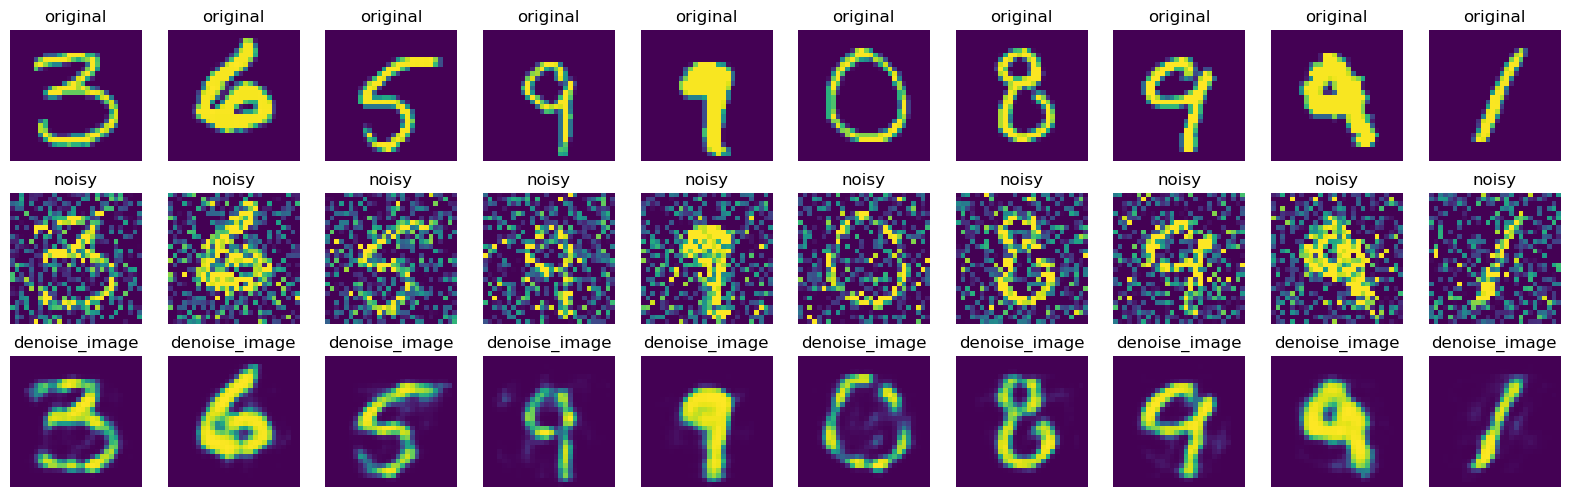

In [30]:
denoise_image = autoencoder.predict(x_test_noisy)
n=10
plt.figure(figsize=(20,6))

for i in range (n):
    ax = plt.subplot(3,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("original")
    plt.axis('off')
    
    ax = plt.subplot(3,n,i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.title("noisy")
    plt.axis('off')
    
    ax = plt.subplot(3,n,i+1+2*n)
    plt.imshow(denoise_image[i].reshape(28,28))
    plt.title("denoise_image")
    plt.axis('off')
    
plt.show()